In [1]:
# First, import the necessary modules and functions
import os

import matplotlib.pyplot as plt
from myst_nb import glue
from nilearn import image, plotting
from repo2data.repo2data import Repo2Data

import nimare

# Install the data if running locally, or points to cached data if running on neurolibre
DATA_REQ_FILE = os.path.join("../binder/data_requirement.json")
FIG_DIR = os.path.abspath("../images")

# Download data
repo2data = Repo2Data(DATA_REQ_FILE)
data_path = repo2data.install()
data_path = os.path.join(data_path[0], "data")

# Now, load the Datasets we will use in this chapter
sleuth_dset1 = nimare.dataset.Dataset.load(os.path.join(data_path, "sleuth_dset1.pkl.gz"))
sleuth_dset2 = nimare.dataset.Dataset.load(os.path.join(data_path, "sleuth_dset2.pkl.gz"))

/home/data/nbc/misc-projects/Salo_NiMARE/conda_env/lib/python3.7/site-packages/nilearn/datasets/__init__.py:90: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  "Numpy arrays.", FutureWarning)


---- repo2data starting ----
/home/data/nbc/misc-projects/Salo_NiMARE/conda_env/lib/python3.7/site-packages/repo2data
Config from file :
../binder/data_requirement.json
Destination:
./../data/nimare-paper

Info : ./../data/nimare-paper already downloaded


In [2]:
from nimare import meta

kern = meta.kernel.ALEKernel()
sub_meta = meta.cbma.ale.ALESubtraction(kernel_transformer=kern, n_iters=10000)
sub_results = sub_meta.fit(sleuth_dset1, sleuth_dset2)

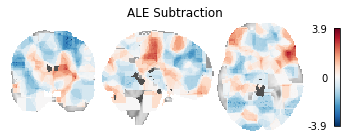

In [3]:
fig, ax = plt.subplots(figsize=(6, 2))
display = plotting.plot_stat_map(
    sub_results.get_map("z_desc-group1MinusGroup2", return_type="image"),
    annotate=False,
    axes=ax,
    cmap="RdBu_r",
    cut_coords=[0, 0, 0],
    draw_cross=False,
    figure=fig,
)
ax.set_title("ALE Subtraction")

colorbar = display._cbar
colorbar_ticks = colorbar.get_ticks()
if colorbar_ticks[0] < 0:
    new_ticks = [colorbar_ticks[0], 0, colorbar_ticks[-1]]
else:
    new_ticks = [colorbar_ticks[0], colorbar_ticks[-1]]
colorbar.set_ticks(new_ticks, update_ticks=True)
glue("figure_subtraction", fig, display=False)